### Load the Data

**Goal 1:** Create a pipeline for converting [G10 BIS RPP Growth data](https://data.bis.org/topics/RPP) to series data.

*Bank for International Settlements (2025), Residential property prices, BIS WS_DPP 1.0 and BIS WS_SPP 1.0 (data sets), https://data.bis.org/topics/RPP/data (accessed on 16 July 2025).*

In [1]:
import pandas as pd
from country_codes import CODE_TO_COUNTRY

BIS_RPP_GROWTH_URL = "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_SPP/1.0/Q.BE+CA+CH+DE+FR+GB+IT+JP+NL+SE+US.R.771?format=csv"

RPP_growth = pd.read_csv(BIS_RPP_GROWTH_URL)[["REF_AREA", "TIME_PERIOD", "OBS_VALUE"]].pivot(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
)

RPP_growth.index = pd.PeriodIndex(RPP_growth.index, freq="Q").to_timestamp()
RPP_growth.index.name = "Date"

RPP_growth.columns.name = None
RPP_growth.columns = RPP_growth.columns.map(lambda c: CODE_TO_COUNTRY[c])

RPP_growth = RPP_growth.interpolate(limit_area="inside")

In [2]:
RPP_growth

,Belgium,Canada,Switzerland,Denmark,France,United Kingdom,Italy,Japan,Netherlands,Sweden,United States
Date,,,,,,,,,,,
1948-01-01,NaN,NaN,NaN,NaN,NaN,NaN,5.1995,NaN,NaN,NaN,NaN
1948-04-01,NaN,NaN,NaN,NaN,NaN,NaN,15.0591,NaN,NaN,NaN,NaN
1948-07-01,NaN,NaN,NaN,NaN,NaN,NaN,17.1932,NaN,NaN,NaN,NaN
1948-10-01,NaN,NaN,NaN,NaN,NaN,NaN,13.1009,NaN,NaN,NaN,NaN
1949-01-01,NaN,NaN,NaN,NaN,NaN,NaN,-1.8206,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,0.4773,-1.8323,0.3107,-7.5491,-7.3505,-4.6943,0.6618,-0.0346,0.5010,-5.9525,2.1546
2024-04-01,-0.2091,-4.8214,0.0140,-4.6279,-6.6189,-1.6700,2.1156,0.0417,4.6616,-4.0214,1.4790
2024-07-01,0.3610,-5.6676,0.6750,-2.2894,-5.1317,-0.8411,2.7164,0.4514,6.6105,-1.7083,1.0173


**Goal 2:** Create a pipeline for converting [G10 BIS Credit-to-GDP Gap data]("https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CREDIT_GAP/1.0/Q.BE+CA+CH+DE+FR+GB+IT+JP+NL+SE+US.P..C?format=csv") to series data.

*Bank for International Settlements (2025), Credit-to-GDP gaps, BIS WS_CREDIT_GAP 1.0 (data set), https://data.bis.org/topics/CREDIT_GAPS/data (accessed on 16 July 2025).*

In [3]:
BIS_CREDIT_TO_GDP_GAP_URL = "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CREDIT_GAP/1.0/Q.BE+CA+CH+DE+FR+GB+IT+JP+NL+SE+US.P..C?format=csv"

credit_to_GDP_gap = pd.read_csv(BIS_CREDIT_TO_GDP_GAP_URL)[["BORROWERS_CTY", "TIME_PERIOD", "OBS_VALUE"]].pivot(
    index="TIME_PERIOD",
    columns="BORROWERS_CTY",
    values="OBS_VALUE"
)

credit_to_GDP_gap.index = pd.PeriodIndex(credit_to_GDP_gap.index, freq="Q").to_timestamp()
credit_to_GDP_gap.index.name = "Date"

credit_to_GDP_gap.columns.name = None
credit_to_GDP_gap.columns = credit_to_GDP_gap.columns.map(lambda c: CODE_TO_COUNTRY[c])

credit_to_GDP_gap = credit_to_GDP_gap.interpolate(limit_area="inside")

In [4]:
credit_to_GDP_gap

,Belgium,Canada,Switzerland,Denmark,France,United Kingdom,Italy,Japan,Netherlands,Sweden,United States
Date,,,,,,,,,,,
1957-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8
1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
1958-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1
1958-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3
1958-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,-36.9,-15.1,-12.6,-1.7,-12.8,-21.2,-19.2,12.7,-59.4,-34.3,-10.4
2024-01-01,-34.6,-17.1,-11.1,-2.2,-16.1,-22.2,-19.4,12.1,-61.0,-23.5,-10.8
2024-04-01,-34.4,-16.3,-8.4,-2.5,-15.8,-21.4,-19.1,10.7,-61.0,-23.1,-11.0


**Goal 3:** Create a pipeline for converting [G10 OECD GDP Growth data](https://data-explorer.oecd.org/vis?df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_NAMAIN1%40DF_QNA_EXPENDITURE_GROWTH_OECD&df[ag]=OECD.SDD.NAD&df[vs]=&dq=Q..NLD%2BJPN%2BITA%2BGBR%2BUSA%2BFRA%2BSWE%2BDNK%2BCHE%2BCAN%2BBEL.S1..B1GQ......GY.&ly[rw]=REF_AREA&ly[cl]=TIME_PERIOD&to[TIME_PERIOD]=false&vw=ov&pd=1948-Q1%2C) to series data

In [85]:
import requests
from io import StringIO

OECD_GDP_GROWTH_URL = "https://sdmx.oecd.org/public/rest/data/OECD.SDD.NAD,DSD_NAMAIN1@DF_QNA_EXPENDITURE_GROWTH_OECD,/Q..NLD+JPN+ITA+GBR+USA+FRA+SWE+DNK+CHE+CAN+BEL.S1..B1GQ......GY.?format=csvfilewithlabels"

GDP_growth_res = requests.get(OECD_GDP_GROWTH_URL)
GDP_growth = pd.read_csv(StringIO(GDP_growth_res.text))[["Reference area", "TIME_PERIOD", "OBS_VALUE"]].pivot(
    index="TIME_PERIOD",
    columns="Reference area",
    values="OBS_VALUE"
)

GDP_growth.index = pd.PeriodIndex(GDP_growth.index, freq="Q").to_timestamp()
GDP_growth.index.name = "Date"

GDP_growth.columns.name = None

GDP_growth = GDP_growth.interpolate(limit_area="inside")

KeyError: "None of [Index(['Reference area', 'TIME_PERIOD', 'OBS_VALUE'], dtype='object')] are in the [columns]"

In [38]:
GDP_growth

,Belgium,Canada,Denmark,France,Italy,Japan,Netherlands,Sweden,Switzerland,United Kingdom,United States
Date,,,,,,,,,,,
1948-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.611513
1948-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.584426
1948-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.401228
1948-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.893672
1949-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.943214
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,0.808469,0.055052,0.797545,1.694742,0.260237,-0.878413,-0.637574,-0.020305,0.623086,0.680613,2.901832
2024-04-01,0.973743,0.543412,3.915887,0.985424,0.667468,-0.525980,0.747398,0.820651,1.381576,1.099112,3.036849
2024-07-01,1.200872,1.371445,4.967399,1.120538,0.568118,0.732956,1.993210,0.978619,1.713299,1.158393,2.718769


**Goal 4:** Create a pipeline for converting [G10 BIS Central Bank Policy Rates data](https://data.bis.org/topics/CBPOL) to series data

*Bank for International Settlements (2025), Central bank policy rates, BIS WS_CBPOL 1.0 (data set), https://data.bis.org/topics/CBPOL/data (accessed on 16 July 2025).*

In [7]:
BIS_CENTRAL_BANK_RATE_URL = "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBPOL/1.0/M.BE+CA+CH+DE+FR+GB+IT+JP+NL+SE+US?format=csv"

central_bank_rate = pd.read_csv(BIS_CENTRAL_BANK_RATE_URL)[["REF_AREA", "TIME_PERIOD", "OBS_VALUE"]].pivot(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
)

central_bank_rate.index = pd.to_datetime(central_bank_rate.index)
central_bank_rate.index.name = "Date"

central_bank_rate.columns.name = None
central_bank_rate.columns = central_bank_rate.columns.map(lambda c: CODE_TO_COUNTRY[c])

central_bank_rate = central_bank_rate.interpolate(
    limit_area="inside"
).resample("QS").mean()

In [8]:
central_bank_rate

,Belgium,Canada,Switzerland,Denmark,France,United Kingdom,Italy,Japan,Netherlands,Sweden,United States
Date,,,,,,,,,,,
1945-01-01,1.5,NaN,NaN,NaN,1.625,NaN,4.0,NaN,3.5,NaN,NaN
1945-04-01,1.5,NaN,NaN,NaN,1.625,NaN,4.0,NaN,3.5,NaN,NaN
1945-07-01,1.5,NaN,NaN,NaN,1.625,NaN,4.0,NaN,3.5,NaN,NaN
1945-10-01,1.5,NaN,NaN,NaN,1.625,NaN,4.0,NaN,3.5,NaN,NaN
1946-01-01,1.5,NaN,1.500000,NaN,1.625,2.000000,4.0,3.290000,3.5,2.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,NaN,4.916667,1.416667,NaN,NaN,5.250000,NaN,0.050000,NaN,3.833333,5.375000
2024-07-01,NaN,4.416667,1.166667,NaN,NaN,5.083333,NaN,0.183333,NaN,3.583333,5.208333
2024-10-01,NaN,3.583333,0.833333,NaN,NaN,4.833333,NaN,0.250000,NaN,2.916667,4.625000


**Goal 5:** Create pipeline for convering [G10 BIS Inflation data](https://data.bis.org/topics/CPI) to series data
*Bank for International Settlements (2025), Consumer prices, BIS WS_LONG_CPI 1.0 (data set), https://data.bis.org/topics/CPI/data (accessed on 16 July 2025).*

In [9]:
BIS_INFLATION_URL = "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_LONG_CPI/1.0/M.BE+CA+CH+DE+FR+GB+IT+JP+NL+SE+US.771?format=csv"

inflation = pd.read_csv(BIS_INFLATION_URL)[["REF_AREA", "TIME_PERIOD", "OBS_VALUE"]].pivot(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
)

inflation.index = pd.to_datetime(inflation.index)
inflation.index.name = "Date"

inflation.columns.name = None
inflation.columns = inflation.columns.map(lambda c: CODE_TO_COUNTRY[c])

inflation = inflation.interpolate(
    limit_area="inside"
).resample("QS").mean()

In [10]:
inflation

,Belgium,Canada,Switzerland,Denmark,France,United Kingdom,Italy,Japan,Netherlands,Sweden,United States
Date,,,,,,,,,,,
1914-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.360544
1914-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.027421
1914-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.013468
1914-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996700
1915-01-01,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.670034
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,3.493929,2.741140,1.361995,2.286435,2.209394,2.111562,0.808508,2.726656,2.888405,3.395655,3.199263
2024-07-01,3.186422,2.041265,1.064649,1.930322,1.742253,2.055648,1.027898,2.769235,3.581275,2.040755,2.622039
2024-10-01,3.186012,1.912929,0.660040,2.298145,1.270243,2.475404,1.169316,2.930829,3.887338,1.316419,2.745114


**Goal 6:** Create a pipeline for converting [G10 OECD Household DTI data](https://data-explorer.oecd.org/vis?df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_NAAG%40DF_NAAG&df[ag]=OECD.SDD.NAD&df[vs]=&pd=%2C&dq=A.DNK%2BNLD%2BJPN%2BFRA%2BBEL%2BCAN%2BITA%2BSWE%2BCHE%2BGBR%2BUSA.LES1M_FD4..&to[TIME_PERIOD]=false&vw=tb&lb=bt&lc=en&pg=0) to series data

In [ ]:
import requests
from io import StringIO

OECD_HOUSEHOLD_DTI_URL = "https://sdmx.oecd.org/public/rest/data/OECD.SDD.NAD,DSD_NAAG@DF_NAAG,/A.DNK+NLD+JPN+FRA+BEL+CAN+ITA+SWE+CHE+GBR+USA.LES1M_FD4..?dimensionAtObservation=AllDimensions&format=csvfilewithlabels"

household_DTI = requests.get(OECD_HOUSEHOLD_DTI_URL)
household_DTI = pd.read_csv(StringIO(household_DTI.text))[["Reference area", "TIME_PERIOD", "OBS_VALUE"]].pivot(
    index="TIME_PERIOD",
    columns="Reference area",
    values="OBS_VALUE"
)

household_DTI.index = pd.to_datetime(household_DTI.index, format="%Y")
household_DTI.index.name = "Date"

household_DTI.columns.name = None

household_DTI = household_DTI.interpolate(limit_area="inside")

### Create Factor Models

**Goal 6:** For a single country (United States), model RPP growth as a linear function of credit gaps, GDP growth, central bank policy rates, and inflation.

In [11]:
US_data = pd.concat([
    RPP_growth["United States"],
    credit_to_GDP_gap["United States"],
    GDP_growth["United States"],
    central_bank_rate["United States"],
    inflation["United States"]
], axis=1)

US_data.columns = ["RPP_growth", "credit_to_GDP_gap", "GDP_growth", "central_bank_rate", "inflation"]

US_data.dropna(inplace=True)

In [12]:
import statsmodels.api as sm

Y = US_data["RPP_growth"]
X = US_data.drop(columns=["RPP_growth"])
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RPP_growth   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     14.84
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           1.07e-10
Time:                        21:26:12   Log-Likelihood:                -646.80
No. Observations:                 216   AIC:                             1304.
Df Residuals:                     211   BIC:                             1320.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0062      0.720     -0.009      0.993      -1.425       1.413
credit_to_GDP_gap     0.0622      0.049      1.273      0.204      -0.034       0.158
GDP_growth            1.0934      0.149      7.361      0.000       0.801       1.386
central_bank_rate    -0.3827      0.126     -3.029      0.003      -0.632      -0.134
inflation             0.2264      0.167      1.359      0.175      -0.102       0.555
==============================================================================
Omnibus:                       56.450   Durbin-Watson:                   0.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.931
Skew:                          -1.167   Prob(JB):                     6.78e-31
Kurtosis:                       6.161   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With a $R^2$ of 0.220, this a pretty poor model.

**Goal 7:** For a single country (United States), model RPP growth with the same features as above with a SARIMAX model.

In [15]:
import warnings
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_order = None

for order in pdq:
    try:
        model = SARIMAX(Y, exog=X, order=order)
        results = model.fit(disp=False)
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
    except:
        continue

print(f"Best SARIMAX order: {best_order} with AIC {best_aic:.2f}")

c:\Users\zachl\Eric's Projects\housing-bubble-index\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\zachl\Eric's Projects\housing-bubble-index\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\zachl\Eric's Projects\housing-bubble-index\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\zachl\Eric's Projects\housing-bubble-index\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

Best SARIMAX order: (2, 0, 2) with AIC 653.29


c:\Users\zachl\Eric's Projects\housing-bubble-index\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    Y,
    exog=X,
    order=(2, 0, 2)
)

results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             RPP_growth   No. Observations:                  216
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -316.647
Date:                Thu, 17 Jul 2025   AIC                            653.293
Time:                        21:29:07   BIC                            687.046
Sample:                    01-01-1971   HQIC                           666.929
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.7201      1.717      2.749      0.006       1.354       8.086
credit_to_GDP_gap    -0.0017      0.030     -0.058      0.954      -0.060       0.057
GDP_growth            0.

c:\Users\zachl\Eric's Projects\housing-bubble-index\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
X_counterfactual = X.copy()
X_counterfactual["credit_to_GDP_gap"] = 0

coef = results.params[X.columns]

fitted_actual = X @ coef
fitted_counterfactual = X_counterfactual @ coef

credit_effect = fitted_actual - fitted_counterfactual

df = pd.DataFrame({
    "Housing Growth Prediction": fitted_actual,
    "Without Credit Gap": fitted_counterfactual,
    "Credit Effect": credit_effect
})

In [25]:
df["Credit Effect"] / df["Housing Growth Prediction"] * 100

Date
1971-01-01    0.774296
1971-04-01    0.380035
1971-07-01    0.346350
1971-10-01    0.220929
1972-01-01    0.256481
                ...   
2023-10-01    0.660368
2024-01-01    0.695436
2024-04-01    0.693718
2024-07-01    0.593552
2024-10-01    0.703976
Freq: QS-OCT, Length: 216, dtype: float64

C:\Users\zachl\AppData\Local\Temp\ipykernel_47820\1341832803.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


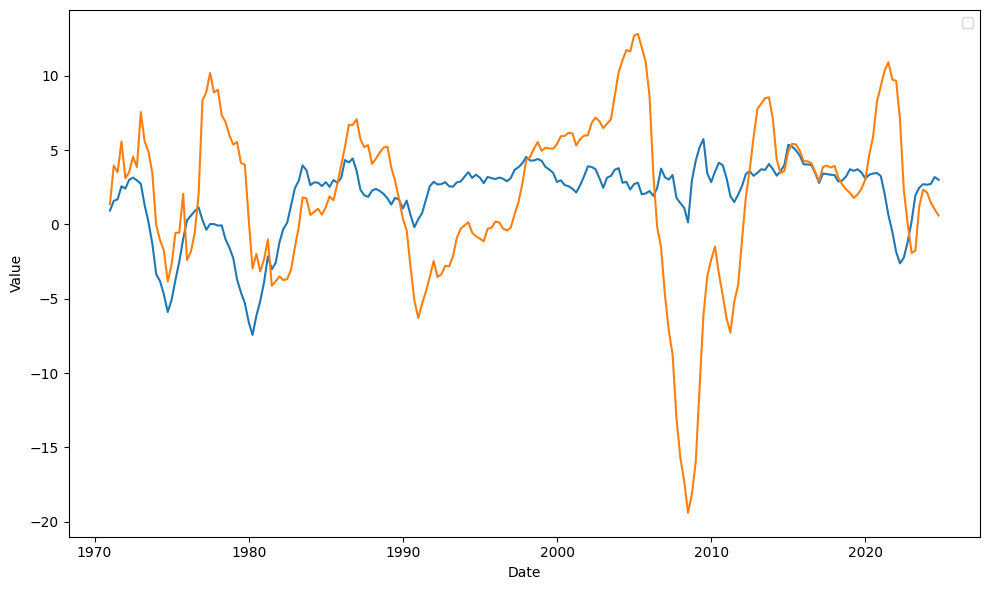

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df["Housing Growth Prediction"])
plt.plot(Y)

plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

In [30]:
US_data.corr()

,RPP_growth,credit_to_GDP_gap,GDP_growth,central_bank_rate,inflation
RPP_growth,1.000000,0.014127,0.423739,-0.130488,-0.096573
credit_to_GDP_gap,0.014127,1.000000,-0.017866,0.232162,0.046335
GDP_growth,0.423739,-0.017866,1.000000,0.092822,-0.054974
central_bank_rate,-0.130488,0.232162,0.092822,1.000000,0.706779
inflation,-0.096573,0.046335,-0.054974,0.706779,1.000000
